# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tabs_names = ['D_clients', 'D_close_loan', 'D_job',
              'D_last_credit', 'D_loan', 'D_pens',
              'D_salary', 'D_target', 'D_work']

In [3]:
[D_clients, D_close_loan, D_job,
 D_last_credit, D_loan, D_pens,
 D_salary, D_target, D_work] = [pd.read_csv(f'https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/{i}.csv') for i in tabs_names]

In [4]:
tabs = [D_clients, D_close_loan, D_job,
        D_last_credit, D_loan, D_pens,
        D_salary, D_target, D_work]

In [5]:
def info_room (i,j):
    print ('------------{}------------'.format(j))
    display(i.head())
    print ('------------Информация------------')
    print(i.info())
    print ('------------Описание------------')
    display(i.describe().T.applymap("{:.2f}".format))
    print ('------------Пропуски------------')
    if i.isnull().sum().sum()>0:
        print (i.isnull().sum()[i.isnull().sum()>0])
    else:
        print('Пропусков НЕТ')
    print ('------------Дубликаты------------')
    if i.duplicated().sum() != 0:
        print ('Дубликатов: ', i.duplicated().sum())
    else:
        print('Дубликатов НЕТ')
    print('')

for i,j in zip(tabs, tabs_names):
    i.columns = i.columns.str.lower().str.replace(' ', '_')
    info_room(i,j)

------------D_clients------------


,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       16000 non-null  int64 
 1   age                      16000 non-null  int64 
 2   gender                   16000 non-null  int64 
 3   education                16000 non-null  object
 4   marital_status           16000 non-null  object
 5   child_total              16000 non-null  int64 
 6   dependants               16000 non-null  int64 
 7   socstatus_work_fl        16000 non-null  int64 
 8   socstatus_pens_fl        16000 non-null  int64 
 9   reg_address_province     16000 non-null  object
 10  fact_address_province    16000 non-null  object
 11  postal_address_province  16000 non-null  object
 12  fl_presence_fl           16000 non-null  int64 
 13  own_auto                 16000 non-null  int64 
dtypes: 

,count,mean,std,min,25%,50%,75%,max
id,16000.00,106812369.50,4618.95,106804370.00,106808369.75,106812369.50,106816369.25,106820369.00
age,16000.00,40.39,11.60,21.00,30.00,39.00,50.00,67.00
gender,16000.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
child_total,16000.00,1.10,1.00,0.00,0.00,1.00,2.00,10.00
dependants,16000.00,0.64,0.81,0.00,0.00,0.00,1.00,7.00
socstatus_work_fl,16000.00,0.91,0.29,0.00,1.00,1.00,1.00,1.00
socstatus_pens_fl,16000.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
fl_presence_fl,16000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
own_auto,16000.00,0.12,0.32,0.00,0.00,0.00,0.00,2.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_close_loan------------


,id_loan,closed_fl
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id_loan    21126 non-null  int64
 1   closed_fl  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
id_loan,21126.00,1753801220.50,6098.70,1753790658.00,1753795939.25,1753801220.50,1753806501.75,1753811783.00
closed_fl,21126.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_job------------


,gen_industry,gen_title,job_dir,work_time,id_client
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen_industry  13856 non-null  object 
 1   gen_title     13856 non-null  object 
 2   job_dir       13856 non-null  object 
 3   work_time     13855 non-null  float64
 4   id_client     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 594.8+ KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
work_time,13855.00,292.21,24364.83,1.00,24.00,48.00,110.00,2867959.00
id_client,15223.00,106811981.00,4394.65,106804370.00,106808175.50,106811981.00,106815786.50,106819592.00


------------Пропуски------------
gen_industry    1367
gen_title       1367
job_dir         1367
work_time       1368
dtype: int64
------------Дубликаты------------
Дубликатов НЕТ

------------D_last_credit------------


,credit,term,fst_payment,id_client
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   credit       15223 non-null  float64
 1   term         15223 non-null  int64  
 2   fst_payment  15223 non-null  float64
 3   id_client    15223 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 475.8 KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
credit,15223.00,14667.96,12147.87,2000.00,6500.00,11550.00,19170.00,119700.00
term,15223.00,8.10,4.09,3.00,6.00,6.00,10.00,36.00
fst_payment,15223.00,3398.56,5158.11,0.00,1000.00,2000.00,4000.00,140000.00
id_client,15223.00,106811981.00,4394.65,106804370.00,106808175.50,106811981.00,106815786.50,106819592.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_loan------------


,id_loan,id_client
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id_loan    21126 non-null  int64
 1   id_client  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
id_loan,21126.00,1753801220.50,6098.70,1753790658.00,1753795939.25,1753801220.50,1753806501.75,1753811783.00
id_client,21126.00,106812881.25,4344.62,106804370.00,106809168.25,106813924.00,106816363.00,106819592.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_pens------------


,id,flag,comment
0,1,0,пенсионер
1,2,1,не пенсионер


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2 non-null      int64 
 1   flag     2 non-null      int64 
 2   comment  2 non-null      object
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
id,2.00,1.50,0.71,1.00,1.25,1.50,1.75,2.00
flag,2.00,0.50,0.71,0.00,0.25,0.50,0.75,1.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_salary------------


,family_income,personal_income,id_client
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family_income    15523 non-null  object 
 1   personal_income  15523 non-null  float64
 2   id_client        15523 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 363.9+ KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
personal_income,15523.00,13848.04,8998.62,24.00,8000.00,12000.00,17000.00,250000.00
id_client,15523.00,106811976.26,4395.86,106804370.00,106808168.50,106811971.00,106815788.50,106819592.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов:  300

------------D_target------------


,agreement_rk,id_client,target
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   agreement_rk  15223 non-null  int64
 1   id_client     15223 non-null  int64
 2   target        15223 non-null  int64
dtypes: int64(3)
memory usage: 356.9 KB
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
agreement_rk,15223.00,65401830.70,4568181.14,59910150.00,61920915.00,64370996.00,67088017.50,75292242.00
id_client,15223.00,106811981.00,4394.65,106804370.00,106808175.50,106811981.00,106815786.50,106819592.00
target,15223.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ

------------D_work------------


,id,flag,comment
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


------------Информация------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3 non-null      int64 
 1   flag     3 non-null      int64 
 2   comment  3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None
------------Описание------------


,count,mean,std,min,25%,50%,75%,max
id,3.00,2.00,1.00,1.00,1.50,2.00,2.50,3.00
flag,3.00,1.00,1.00,0.00,0.50,1.00,1.50,2.00


------------Пропуски------------
Пропусков НЕТ
------------Дубликаты------------
Дубликатов НЕТ



In [6]:
D_salary = D_salary.drop_duplicates() #убираем 300 дублей в записи о зарплате

<Axes: >

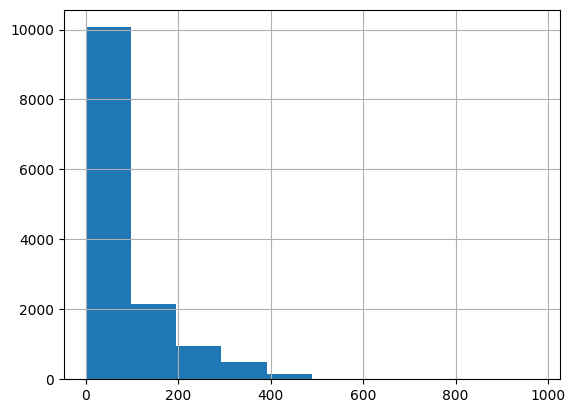

In [7]:
D_job[D_job['work_time']<1000]['work_time'].hist()

In [8]:
D_salary.query('id_client == 106814811')

,family_income,personal_income,id_client
449,от 20000 до 50000 руб.,13000.0,106814811


In [9]:
D_job.head()

,gen_industry,gen_title,job_dir,work_time,id_client
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


In [10]:
for i in D_job.columns:
  display(D_job[D_job[i].isna()].head())
#пропуски в gen_industry, gen_title, job_dir можно заменить как "Нет инфо", а время работы поставить 0
#то есть предполагаем, что опыта работы нет

,gen_industry,gen_title,job_dir,work_time,id_client
16,NaN,NaN,NaN,NaN,106804386
29,NaN,NaN,NaN,NaN,106804399
40,NaN,NaN,NaN,NaN,106804410
43,NaN,NaN,NaN,NaN,106804413
53,NaN,NaN,NaN,NaN,106804423


,gen_industry,gen_title,job_dir,work_time,id_client
16,NaN,NaN,NaN,NaN,106804386
29,NaN,NaN,NaN,NaN,106804399
40,NaN,NaN,NaN,NaN,106804410
43,NaN,NaN,NaN,NaN,106804413
53,NaN,NaN,NaN,NaN,106804423


,gen_industry,gen_title,job_dir,work_time,id_client
16,NaN,NaN,NaN,NaN,106804386
29,NaN,NaN,NaN,NaN,106804399
40,NaN,NaN,NaN,NaN,106804410
43,NaN,NaN,NaN,NaN,106804413
53,NaN,NaN,NaN,NaN,106804423


,gen_industry,gen_title,job_dir,work_time,id_client
16,NaN,NaN,NaN,NaN,106804386
29,NaN,NaN,NaN,NaN,106804399
40,NaN,NaN,NaN,NaN,106804410
43,NaN,NaN,NaN,NaN,106804413
53,NaN,NaN,NaN,NaN,106804423


,gen_industry,gen_title,job_dir,work_time,id_client


In [11]:
for i in ['gen_industry', 'gen_title', 'job_dir']:
  D_job[i] = D_job[i].fillna("Нет инфо")

D_job['work_time'] = D_job['work_time'].fillna(0)

<Axes: >

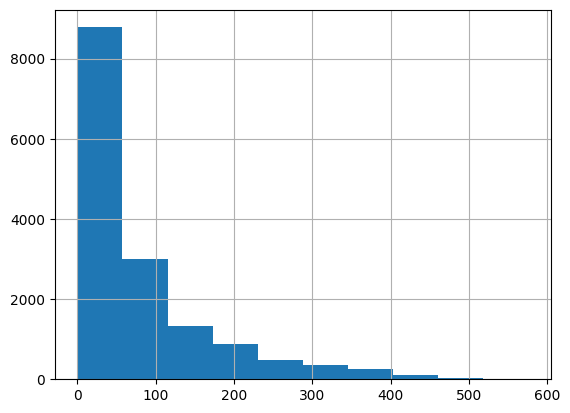

In [12]:
D_job[D_job['work_time']<600]['work_time'].hist()

In [13]:
D_job['work_time'].quantile(0.99)

408.0

In [14]:
#cамому старому клиенту 67 лет, если он начал работать в 14 лет, его стаж был бы 636 мес,
#в выборке есть 13 записией превышающие данные значения
#по гистограме значений свыше 500 практический нет, 99% персентиль - 408 мес.
D_job[D_job['work_time']>636]['work_time'].count()

13

In [15]:
D_job = D_job[D_job['work_time'] < D_job['work_time'].quantile(0.99)]

<Axes: >

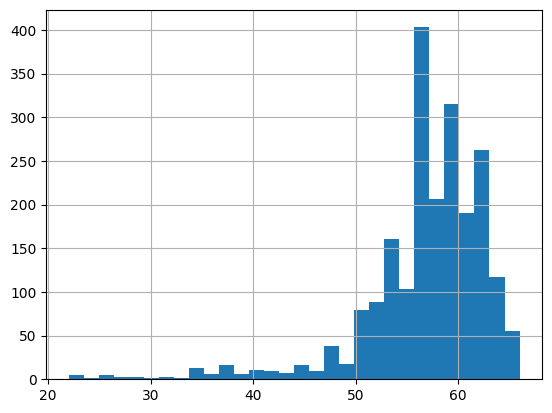

In [16]:
D_clients.query('socstatus_pens_fl == 1')['age'].hist(bins=30)

In [17]:
D_clients.query('socstatus_pens_fl == 1')['age'].quantile(0.05) #около 5% клиентов являются пенсионреами в возрасте до 45,5 лет

45.650000000000006

In [18]:
D_clients = D_clients[
    ~(
        (D_clients['age']<D_clients.query('socstatus_pens_fl == 1')['age'].quantile(0.05)) & (D_clients['socstatus_pens_fl']==1)
        )
    ]

In [19]:
D_salary = D_salary[D_salary['personal_income']<D_salary['personal_income'].quantile(0.98)]

<Axes: >

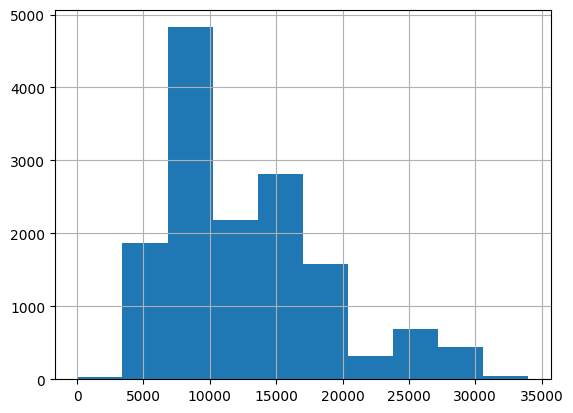

In [20]:
D_salary['personal_income'].hist()

<Axes: >

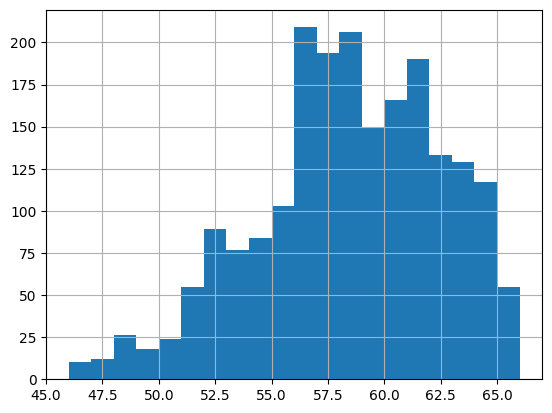

In [21]:
D_clients.query('socstatus_pens_fl == 1')['age'].hist(bins=20)

In [22]:
#x = D_loan.groupby('id_client')['id_loan'].count() #количество ссуд на одного клиента
D_close_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id_loan    21126 non-null  int64
 1   closed_fl  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB


In [23]:
D_loan_hist = D_loan.merge(D_close_loan, how = 'inner', on = 'id_loan')

In [24]:
D_loan_sum = D_loan_hist.groupby('id_client').agg({'id_loan':'count', 'closed_fl':'sum'}) #количество ссуд на одного клиента
D_loan_sum = D_loan_sum.rename(columns={"id_loan": "loans_count"})

In [25]:
D_clients = D_clients.rename(columns={"id": "id_client"})

In [26]:
tab_values = D_target.merge(D_loan_sum, how='inner', on='id_client')
tab_values = tab_values.merge(D_salary[['id_client', 'personal_income']], how='inner', on='id_client')
tab_values = tab_values.merge(D_clients[['id_client', 'age', 'socstatus_work_fl', 'socstatus_pens_fl', 'gender', 'child_total', 'dependants']],
                              how='inner', on='id_client')
tab_values = tab_values.drop(labels='id_client', axis=True)

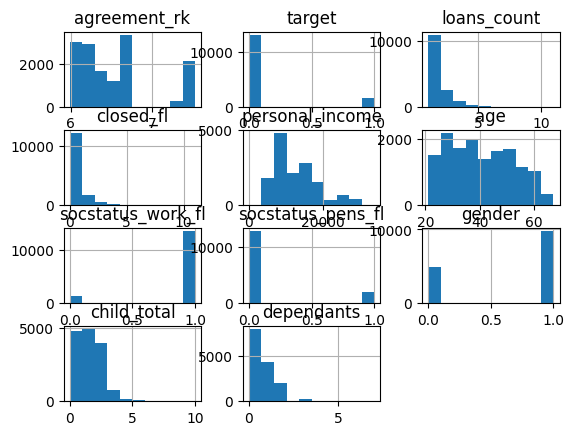

In [27]:
#диаграммы парных респределения занчений
tab_values.hist()
plt.show()

<Axes: >

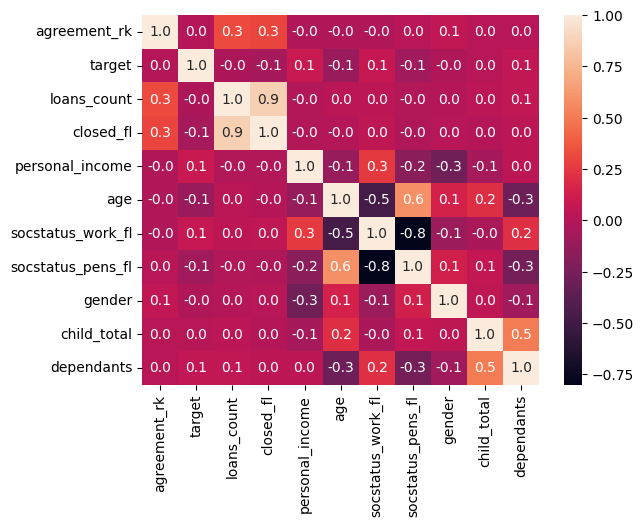

In [28]:
sns.heatmap(data=tab_values.corr(), annot=True, fmt=".1f")

In [29]:
tab_values.corr()

,agreement_rk,target,loans_count,closed_fl,personal_income,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants
agreement_rk,1.000000,0.004487,0.324236,0.303328,-0.023878,-0.014726,-0.024763,0.020644,0.050857,0.010509,0.020690
target,0.004487,1.000000,-0.030762,-0.061085,0.087055,-0.105023,0.077392,-0.083235,-0.026155,0.013331,0.052238
loans_count,0.324236,-0.030762,1.000000,0.861363,-0.012251,0.023240,0.039864,-0.012010,0.005572,0.035158,0.054567
closed_fl,0.303328,-0.061085,0.861363,1.000000,-0.011320,-0.001858,0.044032,-0.022822,0.009925,0.004442,0.042202
personal_income,-0.023878,0.087055,-0.012251,-0.011320,1.000000,-0.125293,0.254676,-0.179085,-0.273916,-0.057972,0.041683
age,-0.014726,-0.105023,0.023240,-0.001858,-0.125293,1.000000,-0.473969,0.582996,0.142666,0.210624,-0.288824
socstatus_work_fl,-0.024763,0.077392,0.039864,0.044032,0.254676,-0.473969,1.000000,-0.801106,-0.101094,-0.042127,0.212733
socstatus_pens_fl,0.020644,-0.083235,-0.012010,-0.022822,-0.179085,0.582996,-0.801106,1.000000,0.134482,0.058481,-0.262998
gender,0.050857,-0.026155,0.005572,0.009925,-0.273916,0.142666,-0.101094,0.134482,1.000000,0.049681,-0.078205
child_total,0.010509,0.013331,0.035158,0.004442,-0.057972,0.210624,-0.042127,0.058481,0.049681,1.000000,0.503166


Между собой имеют высокую корреляюцию факторы "статус пенсионера" и "статус работы" и "количество закрытых ссуд" и "количество ссуд".
Факторов, от которых "отклик" имеет высокую линеную зависимость не выявлено.

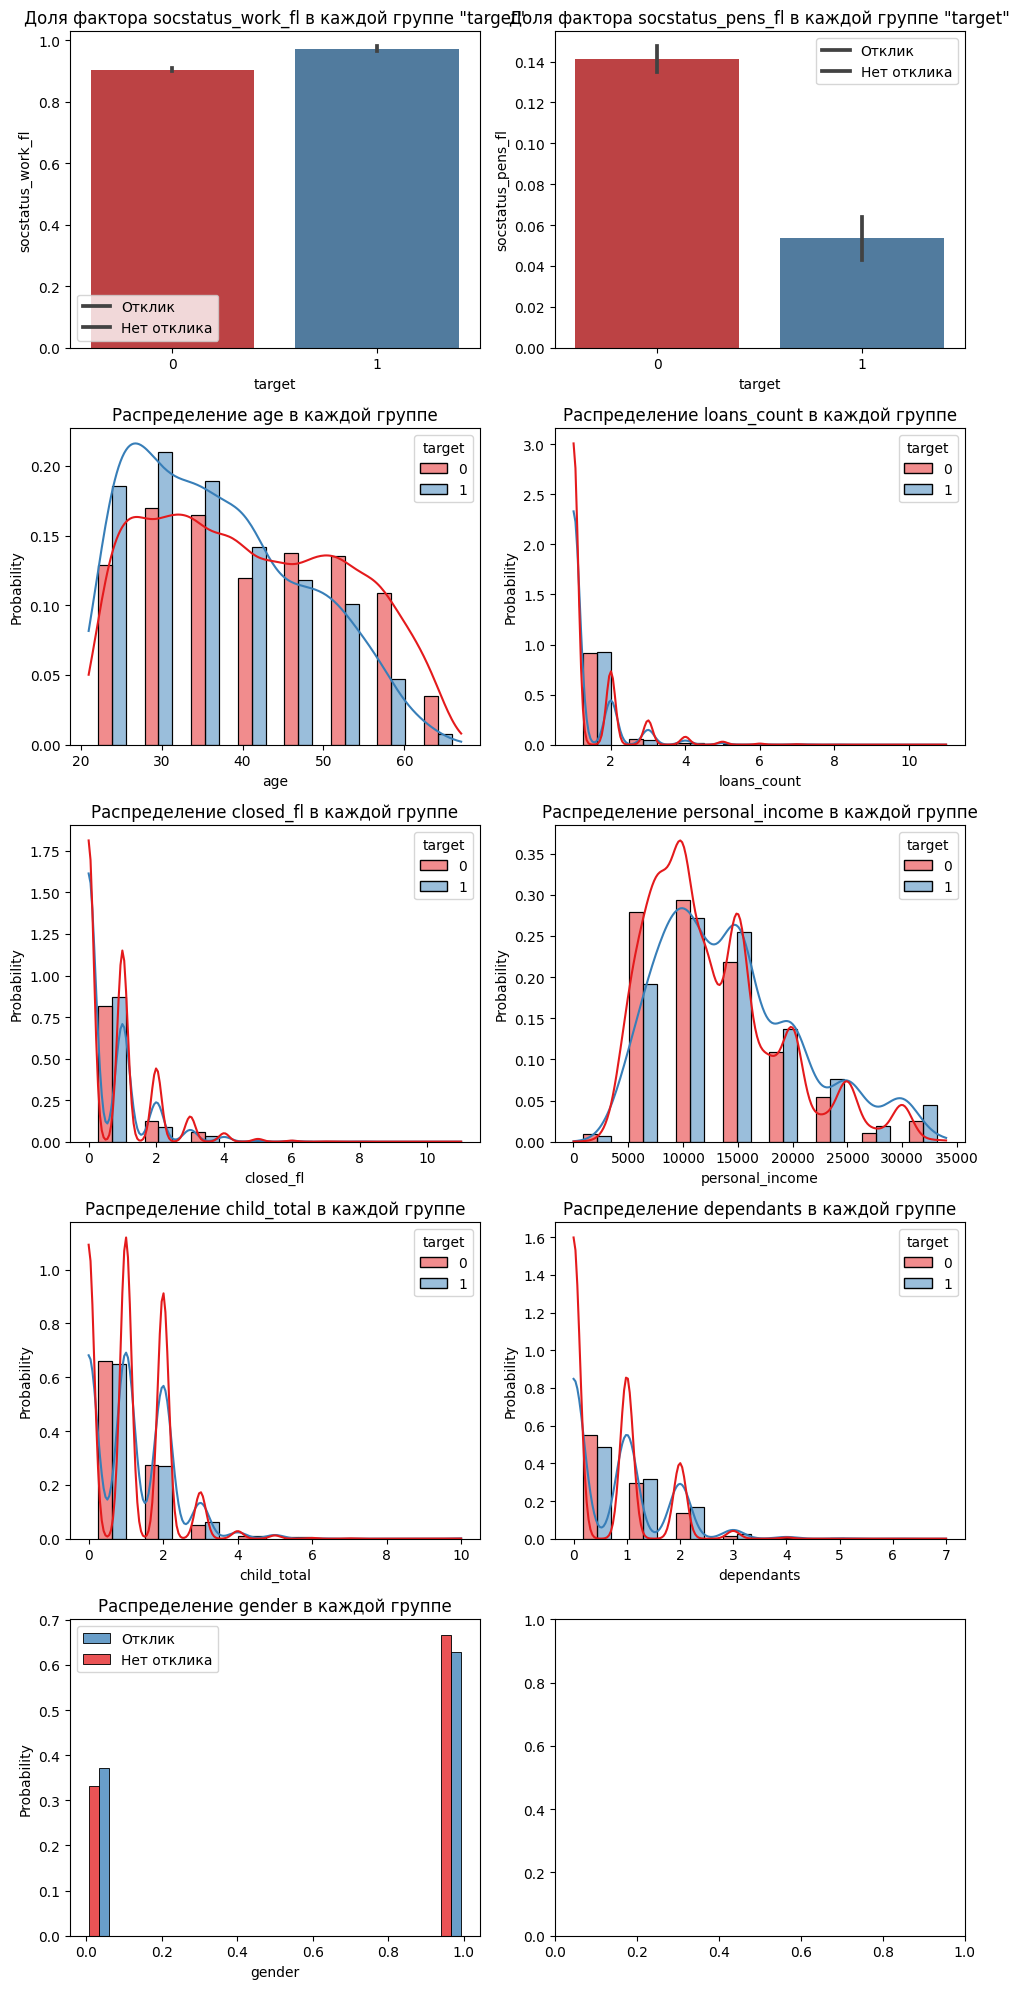

In [30]:
fig, ax = plt.subplots(5, 2, figsize=(10,20))
ax_space = ax.ravel()

#графики для дискретных переменных
cols=['socstatus_work_fl', 'socstatus_pens_fl']
for col, ax in zip(cols, ax_space[:len(cols)]):
    sns.barplot(y=tab_values[col],
                x='target',
                hue= 'target',
                ax=ax,
                data=tab_values,
                linewidth=2.5,
                palette = 'Set1',
                saturation=.6,
                dodge=False)
    ax.set_title(f'Доля фактора {col} в каждой группе "target"')
    ax.legend(labels=['Отклик', 'Нет отклика'])


#графики для количественных переменных
cols_=['age', 'loans_count', 'closed_fl', 'personal_income',
       'child_total', 'dependants']
for col, ax in zip(cols_, ax_space[len(cols):]):
    sns.histplot(x=tab_values[col],
                 ax=ax,
                 hue='target',
                 data=tab_values,
                 multiple="dodge",
                 bins=8,
                 kde=True,
                 stat="probability",
                 common_norm=False,
                 palette = 'Set1',
                 shrink=0.6)
    ax.set_title(f'Распределение {col} в каждой группе')


cols_2=['gender']
for col, ax in zip(cols_2, ax_space[len(cols)+len(cols_):]):
    sns.histplot(x=tab_values[col],
                 ax=ax,
                 hue='target',
                 data=tab_values,
                 multiple="dodge",
                 stat="probability",
                 common_norm=False,
                 palette = 'Set1',
                 shrink=0.8)
    ax.set_title(f'Распределение {col} в каждой группе')
    ax.legend(labels=['Отклик', 'Нет отклика'])

fig.tight_layout()
plt.show()

In [31]:
tab_values.columns

Index(['agreement_rk', 'target', 'loans_count', 'closed_fl', 'personal_income',
       'age', 'socstatus_work_fl', 'socstatus_pens_fl', 'gender',
       'child_total', 'dependants'],
      dtype='object')

In [32]:
tab_analize = tab_values.copy()
tab_analize['age_gr'] = pd.cut(tab_analize['age'], 10)
tab_analize.groupby('age_gr')['target'].mean()

age_gr
(20.954, 25.6]    0.160526
(25.6, 30.2]      0.147451
(30.2, 34.8]      0.123991
(34.8, 39.4]      0.138524
(39.4, 44.0]      0.123201
(44.0, 48.6]      0.102998
(48.6, 53.2]      0.092082
(53.2, 57.8]      0.080342
(57.8, 62.4]      0.038610
(62.4, 67.0]      0.021605
Name: target, dtype: float64

In [33]:
tab_values.columns

Index(['agreement_rk', 'target', 'loans_count', 'closed_fl', 'personal_income',
       'age', 'socstatus_work_fl', 'socstatus_pens_fl', 'gender',
       'child_total', 'dependants'],
      dtype='object')

<Axes: xlabel='age_gr'>

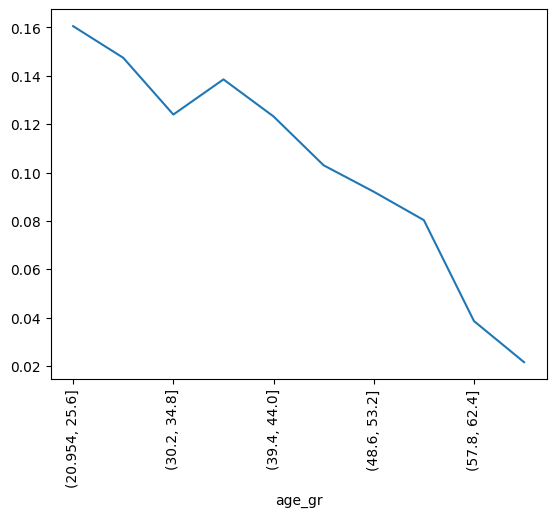

In [34]:
tab_analize.groupby('age_gr')['target'].mean().plot(rot=90)

Отклик на рекламные акции ниже, чем старше возрастная группа

<Axes: xlabel='personal_income', ylabel='Count'>

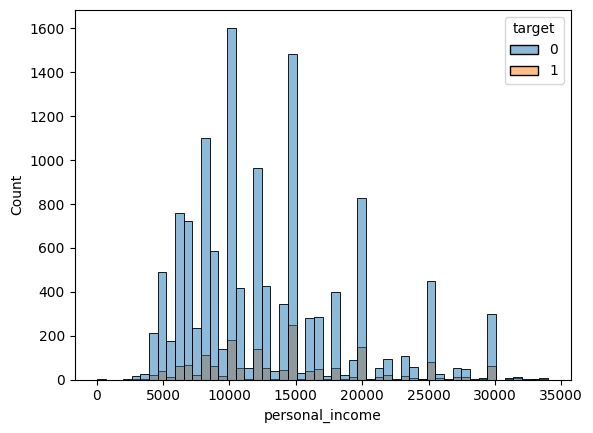

In [35]:
sns.histplot(data=tab_values, x="personal_income", hue="target")

In [36]:
tab_analize['personal_income_gr'] = pd.cut(tab_analize['personal_income'], 8)

<Axes: xlabel='personal_income_gr'>

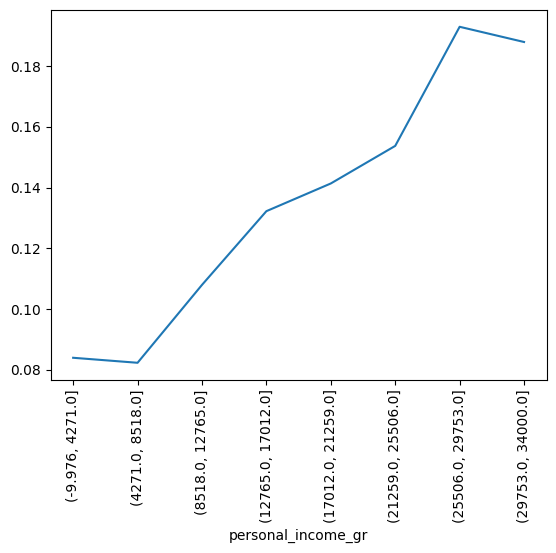

In [37]:
tab_analize.groupby('personal_income_gr')['target'].mean().plot(rot=90)

Отклик на маркетинговые акции выше в группах с более высоким доходом.

<Axes: xlabel='dependants_gr'>

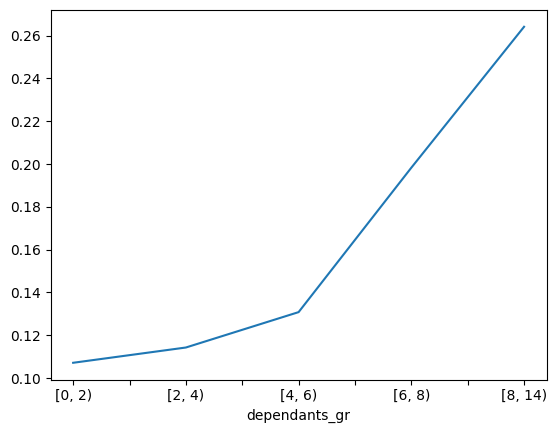

In [38]:
tab_analize['dependants_sum']=tab_analize['dependants']+tab_analize['child_total']
tab_analize['dependants_gr'] = pd.cut(tab_analize['dependants_sum'], [0,2,4,6,8,tab_analize['dependants_sum'].max()], right=False)
tab_analize.groupby('dependants_gr')['target'].mean().plot()

Отклик на маркетинговые акции выше, чем больше детей и иждевенцев у клиента

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.